In [2]:
from RetrieveDB import RetrieveDB

cursor = RetrieveDB(db_connect_type = 'LOCAL')

Connection to the 127.0.0.1 for user root created successfully with <sqlalchemy.engine.base.Connection object at 0x00000155D8467D00>.


In [6]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

c:\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
data = pd.DataFrame(cursor.get_price_per_sqft_dashboard())

In [14]:
start_date

datetime.date(2019, 1, 1)

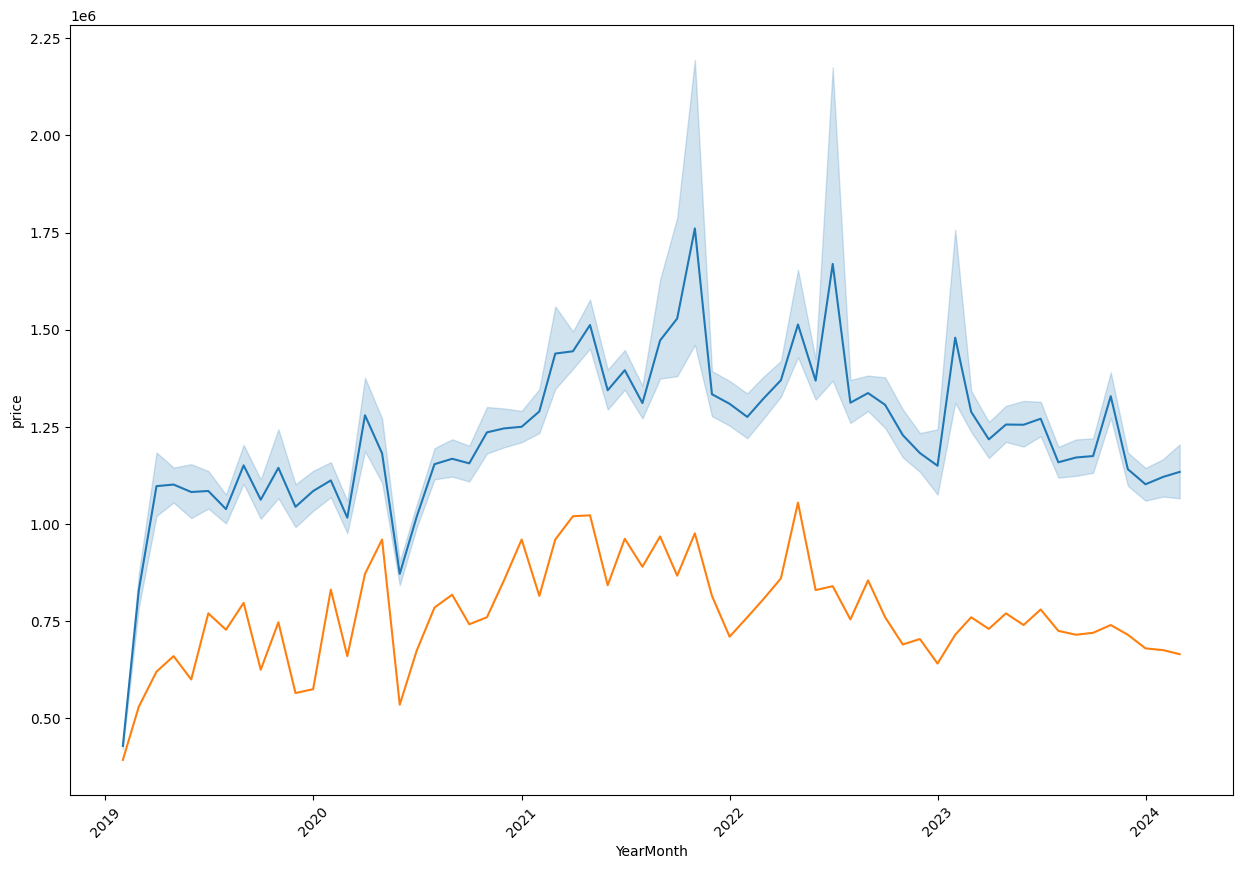

In [17]:
start_date = pd.Timestamp(datetime.date(2019,1,1))
end_date =   pd.to_datetime('today').floor('D')
    
data['transaction_year']= data['transaction_year'].astype(str)
data['transaction_month'] = data['transaction_month'].astype(str)
data['YearMonth'] = pd.to_datetime(data['transaction_year']+ data['transaction_month'], format='%Y%m')

data = data[(data['YearMonth'] >= start_date) & (data['YearMonth'] <= end_date)]



data['YearMonth_str'] = data['transaction_year'] + '-' + data['transaction_month'].str.zfill(2)
monthly_median = data.groupby('YearMonth')['price'].median().reset_index()


data.sort_values('YearMonth', inplace=True)
fig, ax = plt.subplots(figsize=(15, 10))

sns.lineplot(data=data, x='YearMonth', y='price',ax=ax)
sns.lineplot(data=monthly_median, x='YearMonth', y='price',ax=ax)
ax.tick_params(axis='x', labelrotation=45)